ChEn-3170: Computational Methods in Chemical Engineering Spring 2020 UMass Lowell; Prof. V. F. de Almeida **23Mar20**

# 09a. Rank-Deficient Least-Squares Reaction Rates
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Introduction](#intro)
* [Rank-Deficient Reaction mechanism](#rxnmech)
* [Full-Rank Reaction Sub-Mechanisms](#submech)
* [Full-Rank Least-Squares Reaction Rates](#lsr)
* [Residuals of All Sub-Mechanisms](#residuals)
* [Rank-Deficient Basic Least-Squares Reaction Rate Solution of Minimum Norm](#rankdef)
---

## Introduction<a id="intro"></a>

The purpose of this notebook is twofold. First to introduce the *basic* least-squares reaction rate solution of minimum norm (shortest). Second, prove that the LS minimum norm solution (refer to course Notebook 09) has a smaller solution norm.

When $\Smtrx$ is rank deficient, $\Smtrx\,\Smtrx^\top$ is singular. The full-rank linear least-squares method 

\begin{equation*}
\Smtrx\,\Smtrx^\top\,\rvec_\text{LS}  = \Smtrx\,\gvec 
\end{equation*}

*does not have a unique solution*. 

However a **basic** (or trivial) solution can be computed as the full-rank, sub-mechanism LS solution of smallest norm as follows. 

One way to circumvent the rank-deficiency problem for *relatively small system of reactions* is to perform a full-rank reaction sub-mechanism analysis (refer to Notebook 07). Let us call one the $k$th sub-mechanisms' full-rank matrix, $\Smtrx_k$, and its associated least-squares reaction rate the solution of

\begin{equation*}
\Smtrx_k\,\Smtrx_k^\top\,\rvec_k  = \Smtrx_k\,\gvec .
\end{equation*}

Note that $\rvec_k$ does not involve all reaction rates since $\Smtrx_k$ is full rank and $\Smtrx$ is not. Hence only the principal reactions of the original system are accounted for in the sub-mechanism with index $k$. Since each full-rank sub-mechanism carries the same information (independent equations), the residual vector is the same for all $k$

\begin{equation*}
\gvec - \Smtrx_k^\top\,\rvec_k = \text{constant}.
\end{equation*}

Note that the rates $\rvec_k$ are potentially all different.

The objective of this lecture is to compute a particular **unique** $\hat{\rvec}_k$ called the **basic** LS solution of the rank-deficient problem by solving the full-rank least-squares problems $\Smtrx_k\,\Smtrx_k^\top$ and $\bvec = \Smtrx_k\,\gvec$ for all $k$ and selecting $\rvec_k$ of minimal norm. The relation between $\rvec_k$ and $\hat{\rvec}_k$ is a mapping (padding) with zeros on missing entries in the vector $\hat{\rvec}_k$. For this reason the residual of the basic solution has the same magnitude as all sub-mechanism

\begin{equation*}
\norm{\gvec - \Smtrx^\top\,\hat{\rvec}_k} = \norm{\gvec - \Smtrx_k^\top\,\rvec_k} .
\end{equation*}


## Rank-deficient reaction mechanism<a id="rxnmech"></a>
Refer to course Notebook 07.

In [1]:
'''Read a reaction mechanism and create data structures'''

try:    
    from chen_3170.toolkit import reaction_mechanism   
except ModuleNotFoundError:
    assert False, 'You need to provide your own reaction_mechanism function here. Bailing out.'

# build the stoichiometric matrix
(species, reactions, stoic_mtrx, dummy, dummy) = reaction_mechanism('data/ammonia-rxn.txt')

print(species)
from chen_3170.help import print_reactions
print_reactions(reactions)

['O2', 'H2O', 'NH3', 'NO2', 'N2', 'NO']
r0 :  4 NH3 + 5 O2        <=> 4 NO  + 6 H2O
r1 :  4 NH3 + 3 O2        <=> 2 N2  + 6 H2O
r2 :  4 NH3 + 6 NO        <=> 5 N2  + 6 H2O
r3 :  2 NO  + 1 O2        <=> 2 NO2
r4 :  2 NO                <=> 1 N2  + 1 O2
r5 :  1 N2  + 2 O2        <=> 2 NO2
r6 :  4 NH3 + 4 NO + 1 O2 <=> 4 N2  + 6 H2O
n_reactions = 7


matrix shape = (7, 6)


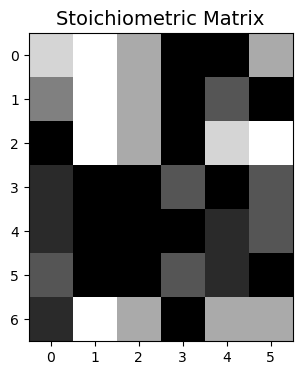

stoic_mtrx=
 [[-5.  6. -4.  0.  0.  4.]
 [-3.  6. -4.  0.  2.  0.]
 [ 0.  6. -4.  0.  5. -6.]
 [-1.  0.  0.  2.  0. -2.]
 [ 1.  0.  0.  0.  1. -2.]
 [-2.  0.  0.  2. -1.  0.]
 [-1.  6. -4.  0.  4. -4.]]

mole balance vector =
 [ 1.  1.  1. -1.  0. -1.  1.]


In [2]:
'''Check the stoichiometric matrix'''

from chen_3170.help import plot_matrix

plot_matrix(stoic_mtrx, title='Stoichiometric Matrix')
import numpy as np
np.set_printoptions(precision=3,threshold=100,edgeitems=5)
print('stoic_mtrx=\n',stoic_mtrx)
print('')
print('mole balance vector =\n', stoic_mtrx.sum(1))

## Full-rank, reaction sub-mechanisms<a id="submech"></a>
Refer to course Notebook 07.

In [3]:
'''Build the full-rank sub-mechanism reactions list'''

try:    
    from chen_3170.toolkit import sub_mechanisms   
except ModuleNotFoundError:
    assert False, 'You need to provide your own sub_mechanisms function here. Bailing out.'

sub_mechanisms = sub_mechanisms(species, reactions, stoic_mtrx)

# reactions =  7
# species   =  6
rank of S =  3
# of all possible sub_mechanisms = 35
# of full-rank sub_mechanisms = 24


In [4]:
'''Top reaction sub-mechanism'''

sub_mechanism_1 = sub_mechanisms[0]
for i in sub_mechanism_1:
    print(i)

(0, 3, 5)
['4 NH3 + 5 O2        <=> 4 NO  + 6 H2O', '2 NO  + 1 O2        <=> 2 NO2', '1 N2  + 2 O2        <=> 2 NO2']
[[-5.  6. -4.  0.  0.  4.]
 [-1.  0.  0.  2.  0. -2.]
 [-2.  0.  0.  2. -1.  0.]]
10.0


In [5]:
'''Top reaction sub-mechanism stoichiometric matrix'''

stoic_mtrx_1 = sub_mechanism_1[2]

#( dummy, dummy, stoic_mtrx_1 ) = reaction_mechanism( reactions = reactions_1 ) # taking advantage of this function

#plot_matrix(stoic_mtrx_1, title='Sub-Mech 1')
print('S_1=\n',stoic_mtrx_1)

S_1=
 [[-5.  6. -4.  0.  0.  4.]
 [-1.  0.  0.  2.  0. -2.]
 [-2.  0.  0.  2. -1.  0.]]


In [6]:
'''Another top reaction sub-mechanism'''

sub_mechanism_2 = sub_mechanisms[1]
print(sub_mechanism_2)

[(1, 3, 5), ['4 NH3 + 3 O2        <=> 2 N2  + 6 H2O', '2 NO  + 1 O2        <=> 2 NO2', '1 N2  + 2 O2        <=> 2 NO2'], array([[-3.,  6., -4.,  0.,  2.,  0.],
       [-1.,  0.,  0.,  2.,  0., -2.],
       [-2.,  0.,  0.,  2., -1.,  0.]]), 10.0]


In [7]:
'''Another top reaction sub-mechanism stoichiometric matrix'''

stoic_mtrx_2 = sub_mechanism_2[2]

#( dummy, dummy, stoic_mtrx_2 ) = reaction_mechanism( reactions = reactions_2 ) # taking advantage of this function

#plot_matrix(stoic_mtrx_1, title='Sub-Mech 2')
print('S_2=\n',stoic_mtrx_2)

S_2=
 [[-3.  6. -4.  0.  2.  0.]
 [-1.  0.  0.  2.  0. -2.]
 [-2.  0.  0.  2. -1.  0.]]


## Full-rank least-squares reaction rates<a id="lsr"></a>
Refer to course Notebook 07.

In [8]:
'''Assume a species production rate as given'''

import numpy as np
#g_vec = np.random.random(len(species))
g_vec = np.ones(len(species))

Here, let's compute $\rvec_1$ for 
$
\Smtrx_1\,\Smtrx_1^\top\,\rvec_1  = \Smtrx_1\,\gvec .
$

In [9]:
'''Compute the LS reaction rates for random species production rates'''

# build A x = b LS problem
a_mtrx = stoic_mtrx_1 @ stoic_mtrx_1.transpose() # A = S ST, A is the normal matrix
b_vec  = stoic_mtrx_1 @ g_vec                    # b = S g

try:    
    from chen_3170.toolkit import lu_factorization   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

# matrix LU factorization of A, the normal matrix
(L,U,P,s_rank) = lu_factorization( a_mtrx, 'partial' ) # matrix is full rank; partial pivoting works
assert s_rank == np.linalg.matrix_rank(stoic_mtrx_1)

from chen_3170.help import forward_solve
try:    
    from chen_3170.toolkit import backward_solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

# solve the LS problem: A x = b
y_vec = forward_solve(L, P @ b_vec)   # L y = P b
x_vec = backward_solve(U, y_vec)      # U x = y

assert np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec)) < 1e-12

print('species production rates g_vec =',g_vec)

r_vec_1 = x_vec # r_1 = x
print('reaction rates r_vec_1 = ',r_vec_1)
residual_vec_1 = g_vec - stoic_mtrx_1.transpose() @ r_vec_1
print('residual norm g - ST_1 r_1 = %8.5e'%np.linalg.norm(residual_vec_1))

species production rates g_vec = [1. 1. 1. 1. 1. 1.]
reaction rates r_vec_1 =  [ 0.023 -0.022 -0.122]
residual norm g - ST_1 r_1 = 2.41508e+00


In [10]:
'''Which reaction rates are these?'''

from chen_3170.help import print_reactions

print_reactions(sub_mechanism_1[1])
print(sub_mechanism_1[0])
print('')
print_reactions(reactions)

r0 :  4 NH3 + 5 O2        <=> 4 NO  + 6 H2O
r1 :  2 NO  + 1 O2        <=> 2 NO2
r2 :  1 N2  + 2 O2        <=> 2 NO2
n_reactions = 3
(0, 3, 5)

r0 :  4 NH3 + 5 O2        <=> 4 NO  + 6 H2O
r1 :  4 NH3 + 3 O2        <=> 2 N2  + 6 H2O
r2 :  4 NH3 + 6 NO        <=> 5 N2  + 6 H2O
r3 :  2 NO  + 1 O2        <=> 2 NO2
r4 :  2 NO                <=> 1 N2  + 1 O2
r5 :  1 N2  + 2 O2        <=> 2 NO2
r6 :  4 NH3 + 4 NO + 1 O2 <=> 4 N2  + 6 H2O
n_reactions = 7


Here, let's compute $\rvec_2$ for 
$
\Smtrx_2\,\Smtrx_2^\top\,\rvec_2  = \Smtrx_2\,\gvec .
$

In [11]:
'''Compute the LS reaction rates for random species production rates'''

# build A x = b LS problem
a_mtrx = stoic_mtrx_2 @ stoic_mtrx_2.transpose() # A = S ST, A is the normal matrix
b_vec  = stoic_mtrx_2 @ g_vec                    # b = S g

from chen_3170.toolkit import lu_factorization # replace with your code

# matrix LU factorization of A
(L,U,P,s_rank) = lu_factorization(a_mtrx, 'partial') # matrix is full rank; partial pivoting works
assert s_rank == np.linalg.matrix_rank(stoic_mtrx_2)

from chen_3170.help import forward_solve
from chen_3170.toolkit import backward_solve # replace with your code

# solve the LS problem: A x = b
y_vec = forward_solve( L, P @ b_vec )
x_vec = backward_solve( U, y_vec )
assert np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec)) < 1e-12

print('species production rates g_vec =',g_vec)

r_vec_2 = x_vec # r_2 = x
print('reaction rates r_vec_2 = ',r_vec_2)
residual_vec_2 = g_vec - stoic_mtrx_2.transpose() @ r_vec_2
print('residual norm g - ST_2 r_2 = %8.5e'%np.linalg.norm(residual_vec_2))

species production rates g_vec = [1. 1. 1. 1. 1. 1.]
reaction rates r_vec_2 =  [ 0.023 -0.068 -0.076]
residual norm g - ST_2 r_2 = 2.41508e+00


In [12]:
'''Which reaction rates are these?'''

from chen_3170.help import print_reactions

print_reactions(sub_mechanism_2[1])
print(sub_mechanism_2[0])
print('')
print_reactions(reactions)

r0 :  4 NH3 + 3 O2        <=> 2 N2  + 6 H2O
r1 :  2 NO  + 1 O2        <=> 2 NO2
r2 :  1 N2  + 2 O2        <=> 2 NO2
n_reactions = 3
(1, 3, 5)

r0 :  4 NH3 + 5 O2        <=> 4 NO  + 6 H2O
r1 :  4 NH3 + 3 O2        <=> 2 N2  + 6 H2O
r2 :  4 NH3 + 6 NO        <=> 5 N2  + 6 H2O
r3 :  2 NO  + 1 O2        <=> 2 NO2
r4 :  2 NO                <=> 1 N2  + 1 O2
r5 :  1 N2  + 2 O2        <=> 2 NO2
r6 :  4 NH3 + 4 NO + 1 O2 <=> 4 N2  + 6 H2O
n_reactions = 7


Note that the sub-mechanisms rates $\rvec_1$ and $\rvec_2$ are different, but the corresponding residuals $\gvec - \Smtrx_1^\top\,\rvec_1$, and $\gvec - \Smtrx_2^\top\,\rvec_2$, are equal!

In [13]:
print('r_vec_1 - r_vec_2             =',r_vec_1 - r_vec_2)
np.set_printoptions(precision=3)
print('g - ST_1 r_1 - (g - ST_2 r_2) =',(g_vec-stoic_mtrx_1.transpose()@r_vec_1)-(g_vec-stoic_mtrx_2.transpose()@r_vec_2))

r_vec_1 - r_vec_2             = [ 3.469e-18  4.641e-02 -4.641e-02]
g - ST_1 r_1 - (g - ST_2 r_2) = [ 0.00e+00 -1.11e-16  0.00e+00  0.00e+00  0.00e+00  0.00e+00]


## Residuals of all sub-mechanisms<a id="residuals"></a>
Let us verify the previous residual result for all sub-mechanims. Here we will compute $\Smtrx_k$ for $k=1,\ldots,$# of full-rank sub-mechanisms and the corresponding LS reaction rates $\rvec_k$ and residuals


\begin{equation*}
\gvec - \Smtrx_k^\top\,\rvec_k .
\end{equation*}



In [14]:
'''Compute the LS residual for all full-rank reaction sub-mechanisms'''

import numpy as np

sub_mech_rxn_rates_mtrx = np.zeros( (s_rank,len(sub_mechanisms)) )       # column-wise storage of all r_k's

sub_mech_residuals_mtrx = np.zeros( (len(species),len(sub_mechanisms)) ) # column-wise storage of all g - ST_k r_k

np.set_printoptions(precision=2)

for sub_mech in sub_mechanisms:
    
    stoic_mtrx_k = sub_mech[2] # view of stoichiometric matrix for sub-mechanism
  
    # assemble LS problem matrix and right side
    a_mtrx = stoic_mtrx_k @ stoic_mtrx_k.transpose()  # A = S ST, A is the normal matrix
    b_vec  = stoic_mtrx_k @ g_vec                     # b = S g

    # matrix LU factorization of A
    (L, U, P, s_rank) = lu_factorization(a_mtrx, 'partial') # matrix is full rank; partial pivoting works
    assert s_rank == np.linalg.matrix_rank(stoic_mtrx_k)

    # solve the LS problem: A x = b
    y_vec = forward_solve( L, P @ b_vec)  # L y = P b
    x_vec = backward_solve( U, y_vec)     # U x = y
    assert np.linalg.norm(x_vec - np.linalg.solve(a_mtrx,b_vec)) < 1e-12
    
    r_vec = x_vec  # r = x
    
    # save sub-mechanism reaction rates for plotting and for later processing
    sub_mech_rxn_rates_mtrx[:,sub_mechanisms.index(sub_mech)] = r_vec
    
    print('rxns ids =',sub_mech[0])
    print('       r =', r_vec)
    
    rate_norm = np.linalg.norm(r_vec)
    print('   ||r|| = %8.3e'%rate_norm)
    
    residual = g_vec - stoic_mtrx_k.transpose() @ r_vec
    
    # save the residuals for plotting
    sub_mech_residuals_mtrx[:,sub_mechanisms.index(sub_mech)] = residual
    
    print('g - ST r     =',residual)
    print('||g - ST r|| = %8.3e'%np.linalg.norm(residual))
    print('')


rxns ids = (0, 3, 5)
       r = [ 0.02 -0.02 -0.12]
   ||r|| = 1.264e-01
g - ST r     = [0.85 0.86 1.09 1.29 0.88 0.86]
||g - ST r|| = 2.415e+00

rxns ids = (1, 3, 5)
       r = [ 0.02 -0.07 -0.08]
   ||r|| = 1.047e-01
g - ST r     = [0.85 0.86 1.09 1.29 0.88 0.86]
||g - ST r|| = 2.415e+00

rxns ids = (2, 3, 5)
       r = [ 0.02 -0.14 -0.01]
   ||r|| = 1.399e-01
g - ST r     = [0.85 0.86 1.09 1.29 0.88 0.86]
||g - ST r|| = 2.415e+00

rxns ids = (3, 5, 6)
       r = [-0.11 -0.03  0.02]
   ||r|| = 1.206e-01
g - ST r     = [0.85 0.86 1.09 1.29 0.88 0.86]
||g - ST r|| = 2.415e+00

rxns ids = (0, 1, 3)
       r = [-0.04  0.06 -0.14]
   ||r|| = 1.611e-01
g - ST r     = [0.85 0.86 1.09 1.29 0.88 0.86]
||g - ST r|| = 2.415e+00

rxns ids = (0, 1, 5)
       r = [ 0.03 -0.01 -0.14]
   ||r|| = 1.485e-01
g - ST r     = [0.85 0.86 1.09 1.29 0.88 0.86]
||g - ST r|| = 2.415e+00

rxns ids = (0, 2, 3)
       r = [-0.    0.02 -0.14]
   ||r|| = 1.462e-01
g - ST r     = [0.85 0.86 1.09 1.29 0.88 0.86]
||g 

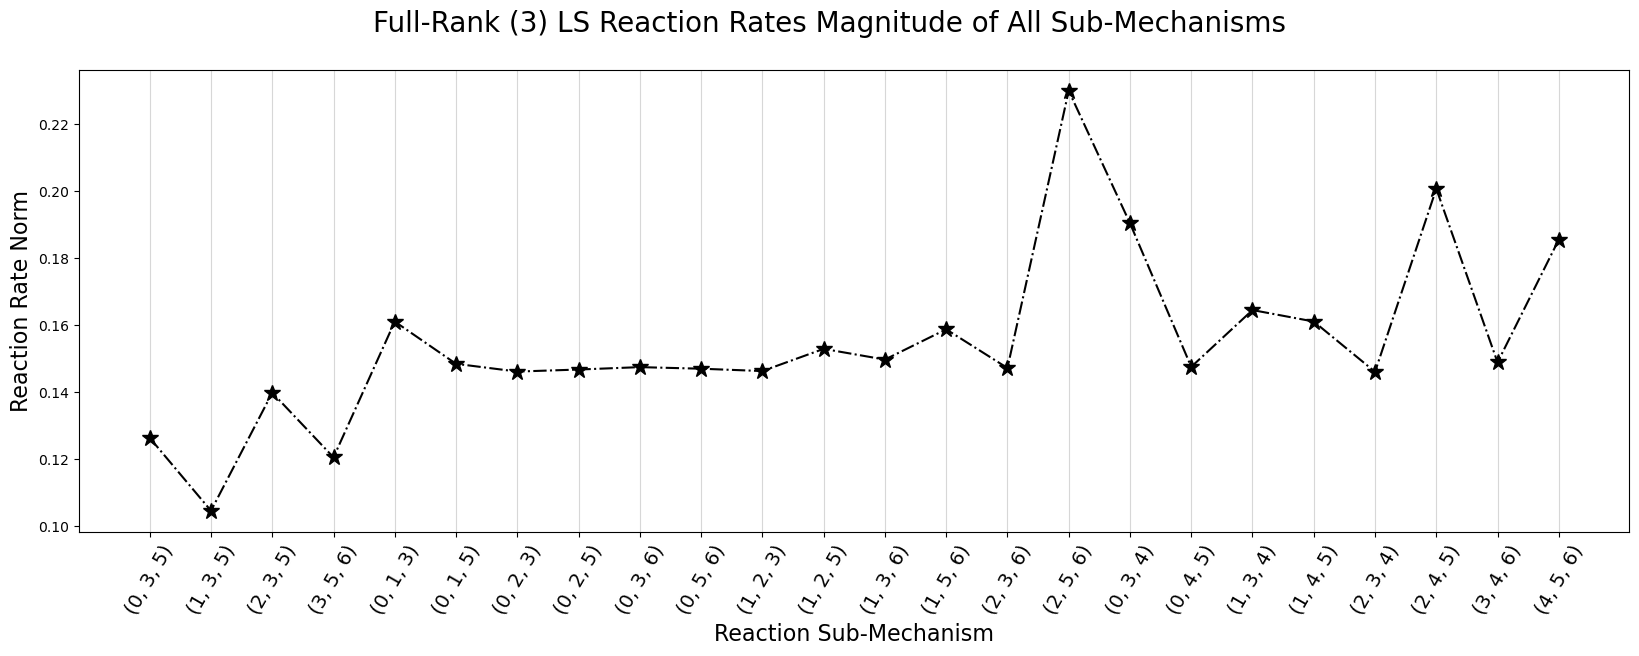

In [15]:
'''Plot the LS reaction rates for all full-rank sub-mechanisms'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(range(sub_mech_rxn_rates_mtrx.shape[1]), np.linalg.norm(sub_mech_rxn_rates_mtrx,axis=0), 
        '-.',color='black', marker='*',markersize=12)

plt.xticks(range(sub_mech_rxn_rates_mtrx.shape[1]),[sm[0] for sm in sub_mechanisms],rotation=60,fontsize=14)
ax.set_ylabel('Reaction Rate Norm',fontsize=16)
ax.set_xlabel('Reaction Sub-Mechanism',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Full-Rank (%i) LS Reaction Rates Magnitude of All Sub-Mechanisms'%(s_rank),fontsize=20)
plt.show()

In [16]:
'''Print the LS reaction rate with minimum norm (unique)'''

rate_min = np.linalg.norm(sub_mech_rxn_rates_mtrx,axis=0).min()

idx_min = np.argmin( np.linalg.norm(sub_mech_rxn_rates_mtrx,axis=0) )

print('sub-mechanism id.              = %i'%idx_min)
print('minimum norm sub-mech rxn rate = %8.4e'%rate_min)
print('sub-mechanism rxn id           =', sub_mechanisms[idx_min][0])
print_reactions(sub_mechanisms[idx_min][1])
print('sub-mechanism rxn score        = %4.2f'%sub_mechanisms[idx_min][3])

sub-mechanism id.              = 1
minimum norm sub-mech rxn rate = 1.0469e-01
sub-mechanism rxn id           = (1, 3, 5)
r0 :  4 NH3 + 3 O2        <=> 2 N2  + 6 H2O
r1 :  2 NO  + 1 O2        <=> 2 NO2
r2 :  1 N2  + 2 O2        <=> 2 NO2
n_reactions = 3
sub-mechanism rxn score        = 10.00


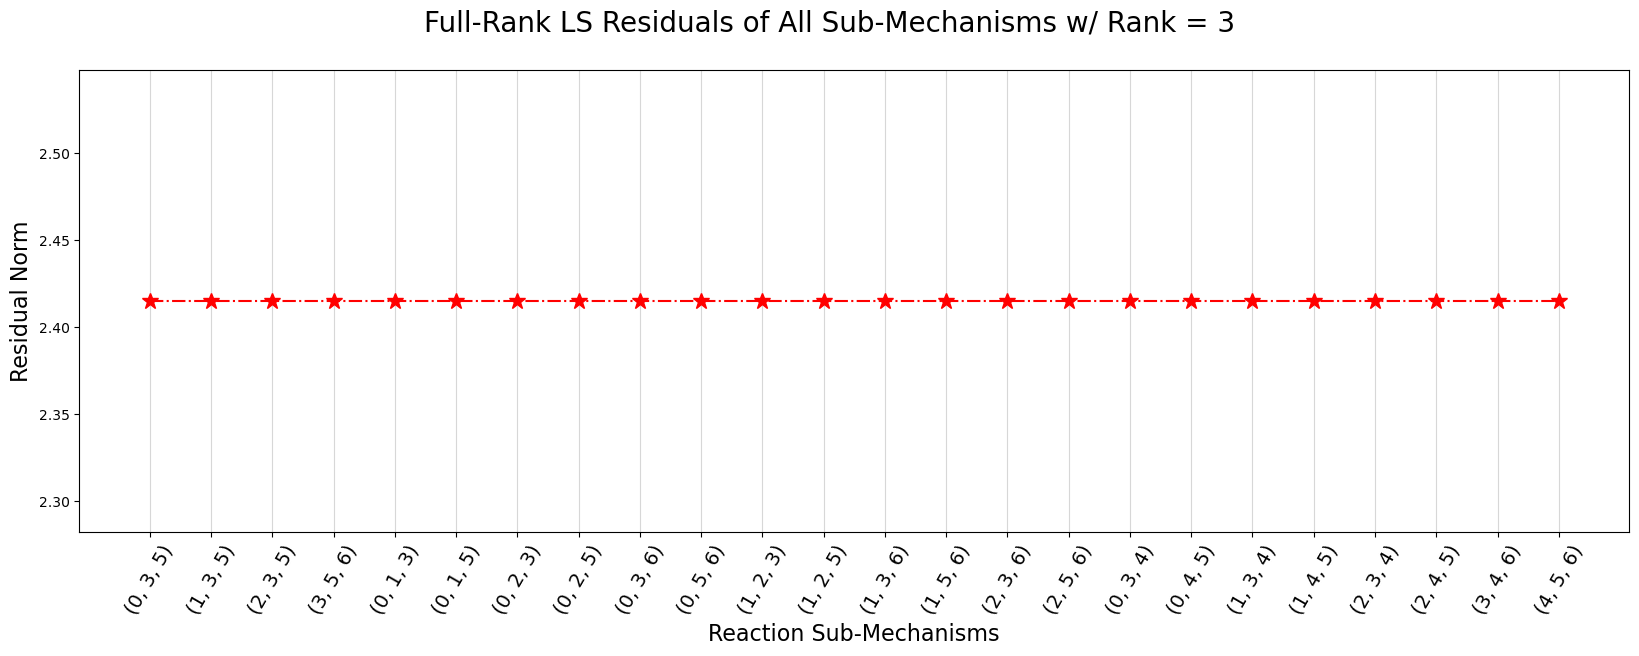

In [17]:
'''Plot the LS residual norms of all full-rank sub-mechanisms'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(range(sub_mech_residuals_mtrx.shape[1]), np.linalg.norm(sub_mech_residuals_mtrx,axis=0),
        '-.',color='red',marker='*',markersize=12)

plt.xticks(range(sub_mech_residuals_mtrx.shape[1]),[smr[0] for smr in sub_mechanisms],rotation=60,fontsize=14)
ax.set_ylabel('Residual Norm',fontsize=16)
ax.set_xlabel('Reaction Sub-Mechanisms',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Full-Rank LS Residuals of All Sub-Mechanisms w/ Rank = '+str(s_rank),fontsize=20)
plt.show()

## Rank-deficient basic least-squares reaction rate solution of minimum norm<a id="rankdef"></a>
Despite all the foregoing development, we have not solved the original problem yet, namely

\begin{equation*}
\Smtrx^\top\,\rvec = \gvec .
\end{equation*}

However this problem is related to the series of sub-mechanisms we just analyzed. To see this, assemble the matrix of sub-mechanism reaction rates mapped into the original reaction dimension $m$ by completing the additional entries with zeros. We denote this vector mapping $\rvec_k\longrightarrow\hat{\rvec}_k$ and the vectors 
$\hat{\rvec}_k$ as **basic** vectors. 

Then we show that all **basic** vectors produce the same residual vectors, that is:

\begin{equation*}
\gvec - \Smtrx^\top\,\hat{\rvec}_k
\end{equation*}

is invariant for any $\hat{\rvec}_k$ and has the same norm as the residuals $\gvec - \Smtrx_k^\top\,\rvec_k$. All residuals being equal, we choose the rank-deficient least-squares **basic** solution as the $\hat{\rvec}_k$ of minimum norm.

In [18]:
'''Map r_k --> \hat{r} rates'''

mech_rxn_rates_mtrx = np.zeros((len(reactions),len(sub_mechanisms))) # reserve space

for sm in sub_mechanisms:
    sm_idx = sub_mechanisms.index(sm)
    rxn_idxs = sm[0]
    mech_rxn_rates_mtrx[rxn_idxs,sm_idx] = sub_mech_rxn_rates_mtrx[:,sm_idx] # map 

matrix shape = (7, 24)


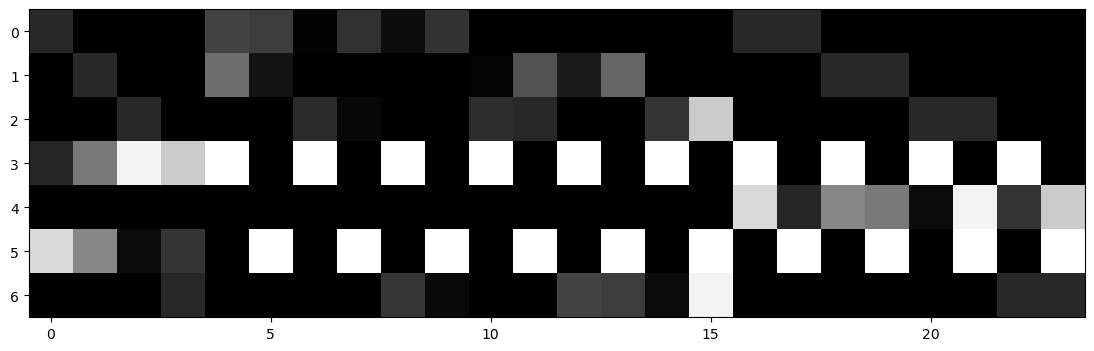

[[ 0.02  0.    0.    0.   -0.04 ...  0.    0.    0.    0.    0.  ]
 [ 0.    0.02  0.    0.    0.06 ...  0.02  0.    0.    0.    0.  ]
 [ 0.    0.    0.02  0.    0.   ...  0.    0.02  0.02  0.    0.  ]
 [-0.02 -0.07 -0.14 -0.11 -0.14 ...  0.   -0.14  0.   -0.14  0.  ]
 [ 0.    0.    0.    0.    0.   ... -0.07  0.01 -0.14  0.03 -0.11]
 [-0.12 -0.08 -0.01 -0.03  0.   ... -0.14  0.   -0.14  0.   -0.14]
 [ 0.    0.    0.    0.02  0.   ...  0.    0.    0.    0.02  0.02]]


In [19]:
'''Show the mapping in the form of a matrix'''

from chen_3170.help import plot_matrix

plot_matrix(mech_rxn_rates_mtrx)

np.set_printoptions(precision=2,threshold=100,edgeitems=5)
print(mech_rxn_rates_mtrx)

Compute $\gvec - \Smtrx^\top\,\hat{\rvec}_k$ for all $k$.

In [20]:
'''Subtract above from g column by column'''

np.set_printoptions(precision=3)

for j in range(mech_rxn_rates_mtrx.shape[1]):
    tmp = g_vec - (stoic_mtrx.transpose() @ mech_rxn_rates_mtrx)[:,j]
    print('residual k = %i'%j,tmp)

residual k = 0 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 1 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 2 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 3 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 4 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 5 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 6 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 7 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 8 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 9 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 10 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 11 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 12 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 13 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 14 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 15 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 16 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 17 [0.85  0.861 1.093 1.288 0.878 0.864]
residual k = 18 [0.85  0.861 1.093 1.2

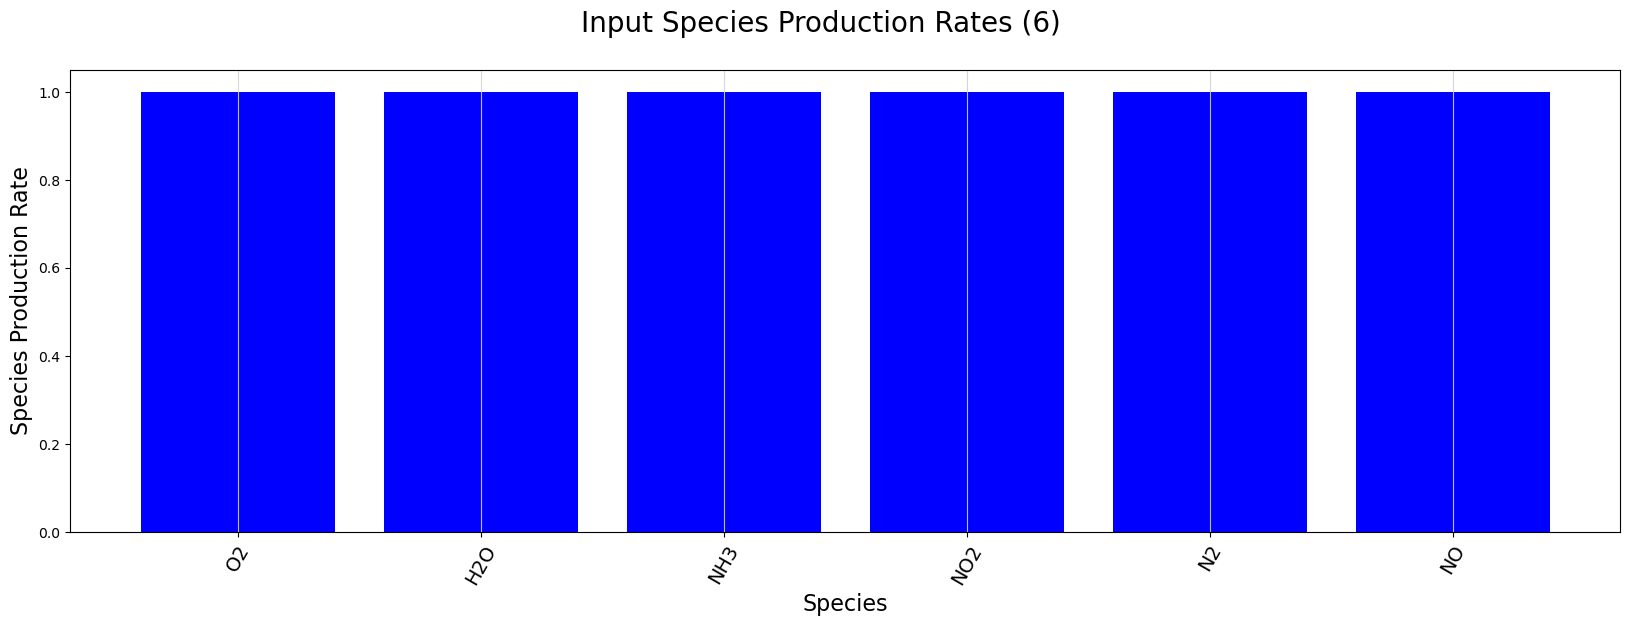

In [21]:
'''Plot of the input species production rate'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
fig, ax = plt.subplots(figsize=(20,6))

ax.bar(range(len(species)), g_vec, color='blue')
plt.xticks(range(len(species)),species,rotation=60,fontsize=14)
ax.set_ylabel('Species Production Rate',fontsize=16)
ax.set_xlabel('Species',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Input Species Production Rates ('+str(len(species))+')',fontsize=20)
plt.show()

Select as **basic** solution of the rank-deficient LS problem: 

\begin{equation*}
\min\limits_k \norm{\hat{\rvec}_k} \quad\ \forall \quad\ k=1,\ldots,\text{# of full-rank sub-mechanisms} .
\end{equation*}

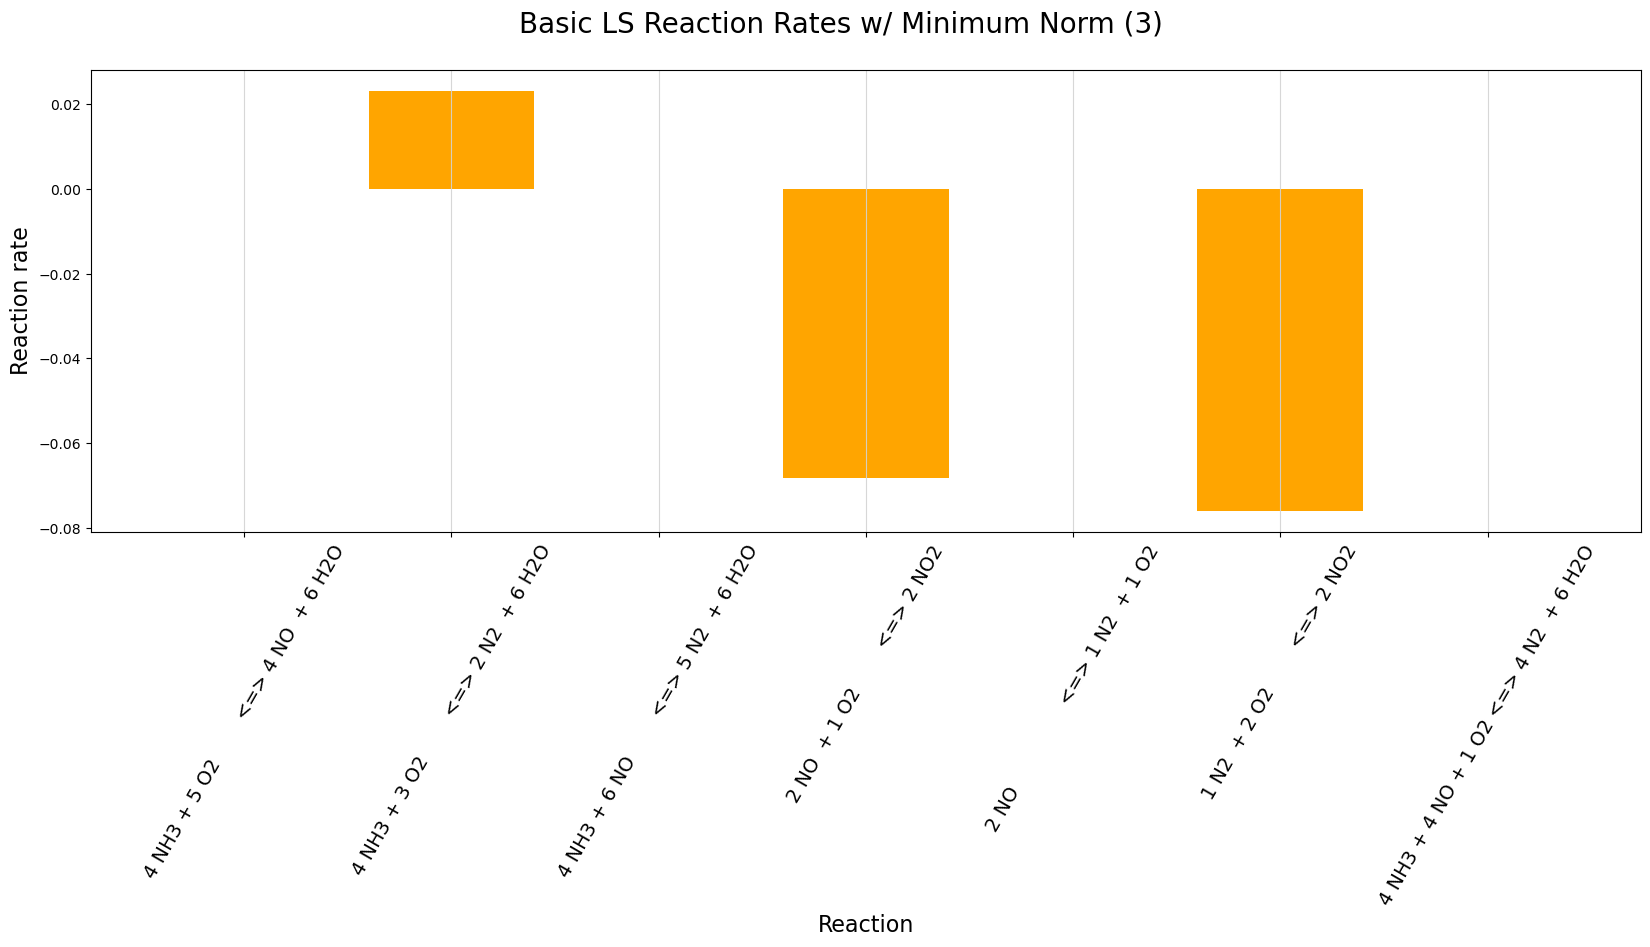

Minimum norm basic rxn rate = 1.0469e-01


In [22]:
'''Basic least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(len(reactions)), mech_rxn_rates_mtrx[:,idx_min], color='orange')
plt.xticks(range(len(reactions)),reactions,rotation=60,fontsize=14)
ax.set_ylabel('Reaction rate',fontsize=16)
ax.set_xlabel('Reaction',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Basic LS Reaction Rates w/ Minimum Norm (%s)'%str(s_rank),fontsize=20)
plt.show()

print('Minimum norm basic rxn rate = %8.4e'%np.linalg.norm(mech_rxn_rates_mtrx[:,idx_min]))